# Homework 3: Univariate Statistics

In [ ]:
MY_UNIQNAME = 'xinyexu'

### The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, puctuation, etc. of written sentences.
- 10 pt: Codes are written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 

## Download the data from: 

* [https://www.kaggle.com/mylesoneill/world-university-rankings](https://www.kaggle.com/mylesoneill/world-university-rankings)

There are three rankings of universities included in the dataset: Center for World University Rankings (*CWUR*), Times Higher Education World University Rankings (*Times*), and Academic Ranking of World Universities (ARWU, or *Shanghai*).

Look at the column descriptions on the Kaggle page. Note that for some columns, there may be some missing values or values that may need some munging in order for your analysis to succeed. **Be sure to look at the values in the columns you work with using `describe()`**—if data are missing or nonsensical, this may suggest that you need to take extra steps to read them in properly.

## Answer the questions below. 
- Write your Python code that can answer the following questions, and
- Explain your answers in plain English. 

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
cwurData = pd.read_csv("./world-university-rankings/cwurData.csv")
shanghaiData = pd.read_csv("./world-university-rankings/shanghaiData.csv")
timesData = pd.read_csv("./world-university-rankings/timesData.csv")
edu_exp = pd.read_csv("./world-university-rankings/education_expenditure_supplementary_data.csv",engine='python')
edu_att = pd.read_csv("./world-university-rankings/educational_attainment_supplementary_data.csv")
sch_cou = pd.read_csv("./world-university-rankings/school_and_country_table.csv")

### Q1. For 20 Points: Compare the distributions of the scores across the three rankings

* Plot histograms and boxplots (or any other plots that you think to be helpful) for the overall scores for the CWUR, Times, and Shanghai rankings. What can you say about them?

Text(0.5, 1.0, 'scores for Shanghai')

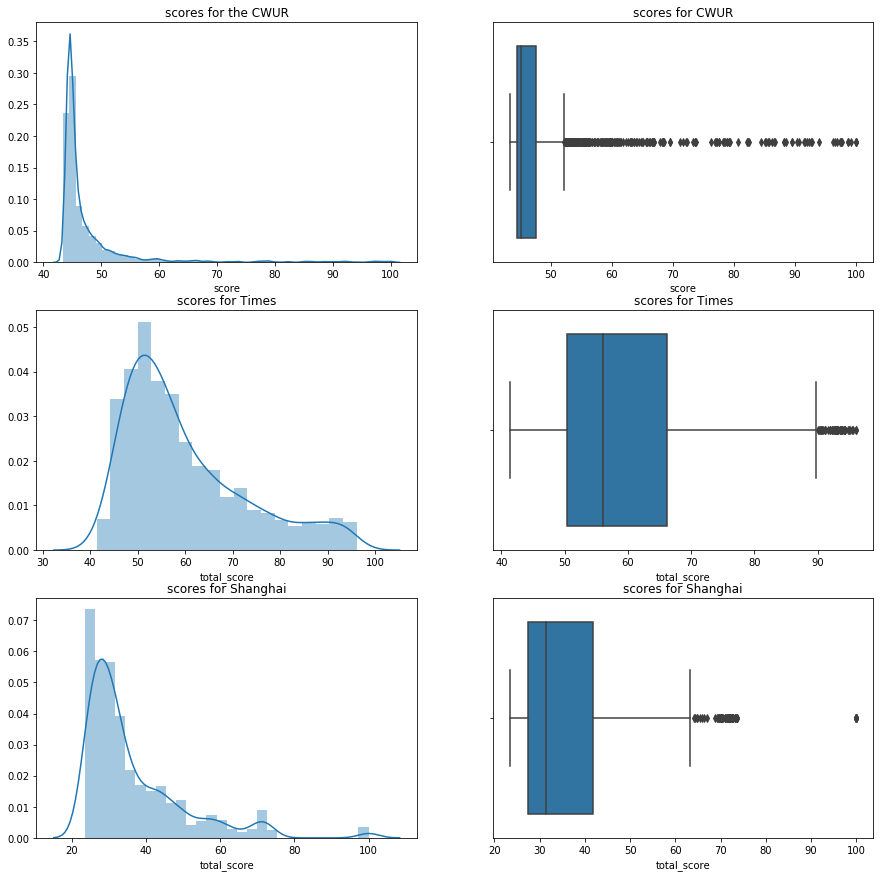

In [27]:
fig, axes = plt.subplots(3,2)
fig.set_size_inches((15,15))

sns.distplot(cwurData["score"], ax=axes[0,0]).set_title("scores for the CWUR")
sns.boxplot(cwurData["score"], ax=axes[0,1]).set_title("scores for CWUR")

times_score = pd.to_numeric(timesData["total_score"], errors="coerce").dropna()
sns.distplot(times_score, ax=axes[1,0]).set_title("scores for Times")
sns.boxplot(times_score, ax=axes[1,1]).set_title("scores for Times")

shanghai_score = shanghaiData["total_score"].dropna()
sns.distplot(shanghai_score, ax=axes[2,0]).set_title("scores for Shanghai")
sns.boxplot(shanghai_score, ax=axes[2,1]).set_title("scores for Shanghai")


From above plots, all distributions are not symmetric, they are all have some level of right skewed. 
Also, Times score has a larger range of score, which means a larger bandwidth for its distritbution. 
We can also notice that the modes of three scoring system are nearly 45, 55, 30


### Q2. For 10 Points: Using the Times data, look at the number of students (`num_students` column) for all universities in 2016.

* Plot the distribution using the `multiplePlots` function from class. What does it look like?
* Compare the mean and median. Are they similar or different, and why?
* Which school has the most students?

mean:  24161.264817150062
median:  20174.0
university_name    Anadolu University
num_students                  379,231
Name: 2413, dtype: object


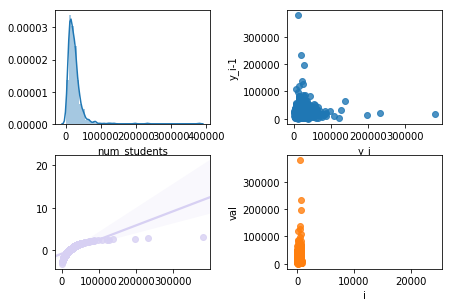

In [34]:
def multiplePlots(series):
    
    fig, axs = plt.subplots(2,2)
    plt.tight_layout(pad=0.4, w_pad=4, h_pad=1.0)

    # Histogram
    sns.distplot(series, ax=axs[0,0])
    
    # Lag plot code here
    lag = series.copy()
    lag = np.array(lag[:-1])
    current = series[1:]
    ax = sns.regplot(current,lag,fit_reg=False, ax=axs[0,1])
    ax.set_ylabel("y_i-1")
    ax.set_xlabel("y_i")

    # QQ plot code here
    qntls, xr = stats.probplot(series, fit=False) # dist='norm', is the default
    sns.regplot(xr,qntls,  ax=axs[1,0], color="#d7d0f3")
    
    # Run Sequence doe here
    ax = sns.regplot(np.arange(len(series)),series,fit_reg=False, ax=axs[1,1])
#     ax.set_ylim(0,10)
    ax.set_ylabel("val")
    ax.set_xlabel("i")
    
    
num_stu = timesData[timesData.year==2016].num_students.dropna()
num_stu = num_stu.apply(lambda x: pd.to_numeric(x.replace(',','')))
multiplePlots(num_stu)
print("mean: ",num_stu.mean())
print("median: ",num_stu.median())
print(timesData.loc[num_stu.idxmax()][["university_name","num_students"]])

From above, the distribution of student number is also right skewed. So in most cases, the number is below 100000. But it might be influenced by some outliers.
There is no abvious trend about the relationship between values and indeces. 
From the qqplot we also find that the student number distribution has lighter left tail and heavier right tail than normal distribution.
Based on the last plot, we can also notice that there are three really large points, whcich has number over 200000. 

Based on the calcilation, it suggests that the mean is greater than median. it follows the conclusion that we made it is right skewed.

Anadolu University has the most students with 379231.

### Q3. For 10 points: Using the Times data, compare the international outlook scores (`international` column) for universities in the US versus universities outside the US.

* Plot their distributions for 2011 and describe them. Identify their their mean and median.
* Repeat this for 2016. Has the result changed?

Text(0.5, 1.0, 'int scores for university not in US 2011')

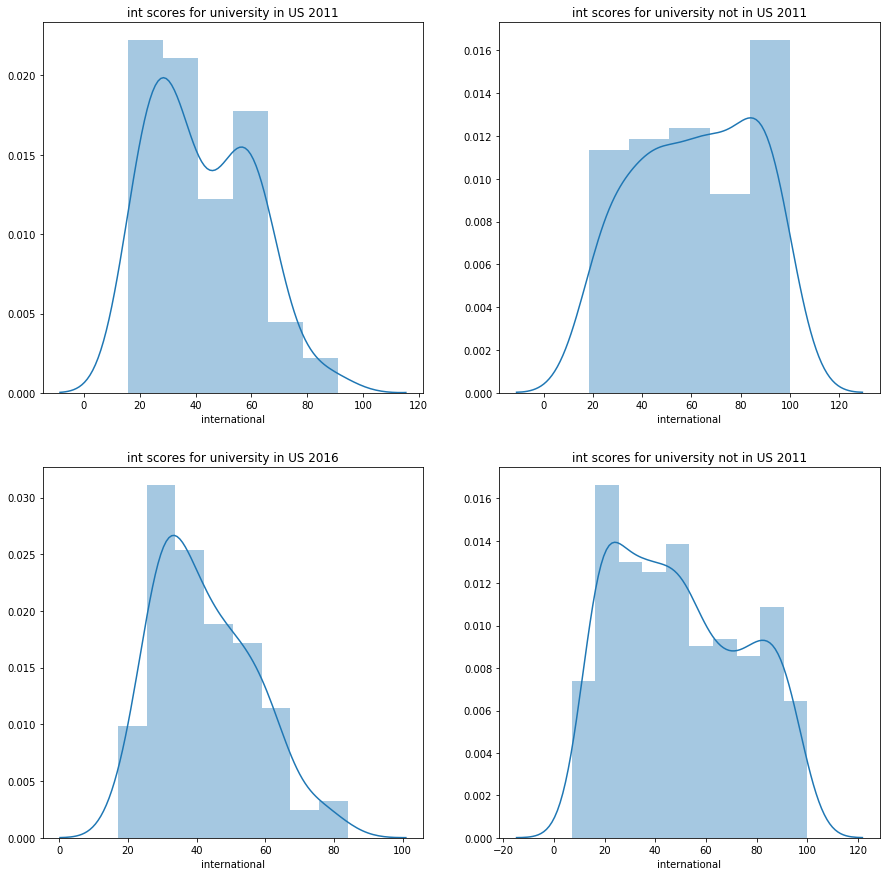

In [37]:
# put your code here
# put your code here
inter_us11 = pd.to_numeric(timesData[(timesData.country=="United States of America") & (timesData.year==2011)]["international"], errors="coerce").dropna()
int_not_us11 = pd.to_numeric(timesData[(timesData.country!="United States of America") & (timesData.year==2011)]["international"], errors="coerce").dropna()
int_in_us16 = pd.to_numeric(timesData[(timesData.country=="United States of America") & (timesData.year==2016)]["international"], errors="coerce").dropna()
int_not_us16 = pd.to_numeric(timesData[(timesData.country!="United States of America") & (timesData.year==2016)]["international"], errors="coerce").dropna()

fig, axes = plt.subplots(2,2)
fig.set_size_inches(15,15)
sns.distplot(inter_us11, ax=axes[0,0]).set_title("int scores for university in US 2011")
sns.distplot(int_not_us11, ax=axes[0,1]).set_title("int scores for university not in US 2011")
sns.distplot(int_in_us16, ax=axes[1,0]).set_title("int scores for university in US 2016")
sns.distplot(int_not_us16, ax=axes[1,1]).set_title("int scores for university not in US 2011")


In [38]:
print("mean in us 2011: ", inter_us11.mean())
print("median in us 2011: ", inter_us11.median())
print("mean not in us 2011: ", int_not_us11.mean())
print("median not in us 2011: ", int_not_us11.median())

print("mean in us 2016: ", int_in_us16.mean())
print("median in us 2016: ", int_in_us16.median())
print("mean not in us 2016: ", int_not_us16.mean())
print("median not in us 2016: ", int_not_us16.median())

mean in us 2011:  42.23055555555556
median in us 2011:  38.6
mean not in us 2011:  61.502521008403356
median not in us 2011:  63.2
mean in us 2016:  42.43150684931507
median in us 2016:  40.2
mean not in us 2016:  49.855198776758414
median not in us 2016:  47.0


YES. In us university has similar plots, which whthin the range of 20-80. But for univerties outisde us, the range has been increased to 10-100 in 2016 compared with 20-100 in 2011. Notice that from the mean and medians, the universities outside us have decreased a lot.

### Q4. For 10 Points: Using the data for the CWUR rankings, investigate how the rankings change over time.

* Which universities consistently appear in the rankings, and which aren't?
* Which universities are rising, falling, or stationary in rank over the years?
* Plot the results, and explain your answers

It might be more intuitive to compare the scores rather than the ranks directly. Feel free to do this if it's the case.

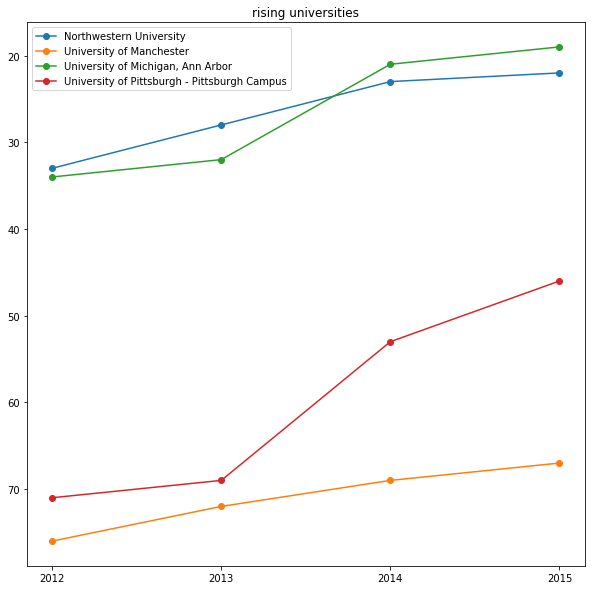

In [89]:
univ_appear = cwurData.groupby("institution")['institution'].count()
univ_appear[univ_appear==4].head()

temp = cwurData.pivot_table(index='institution',columns='year', values="world_rank").dropna()
rising = temp[(temp[2012] > temp[2013]) & (temp[2013] > temp[2014]) & (temp[2014] > temp[2015])]
falling = temp[(temp[2012] < temp[2013]) & (temp[2013] < temp[2014]) & (temp[2014] < temp[2015])]
stationary = temp[(temp[2012] == temp[2013]) & (temp[2013] == temp[2014]) & (temp[2014] == temp[2015])]


plt.figure(figsize=(10,10))
for univ in rising.index:
    plt.plot(rising.loc[univ], marker="o")
plt.xticks([2012,2013,2014,2015])
plt.gca().invert_yaxis()
plt.title("rising universities")
plt.legend(list(rising.index))

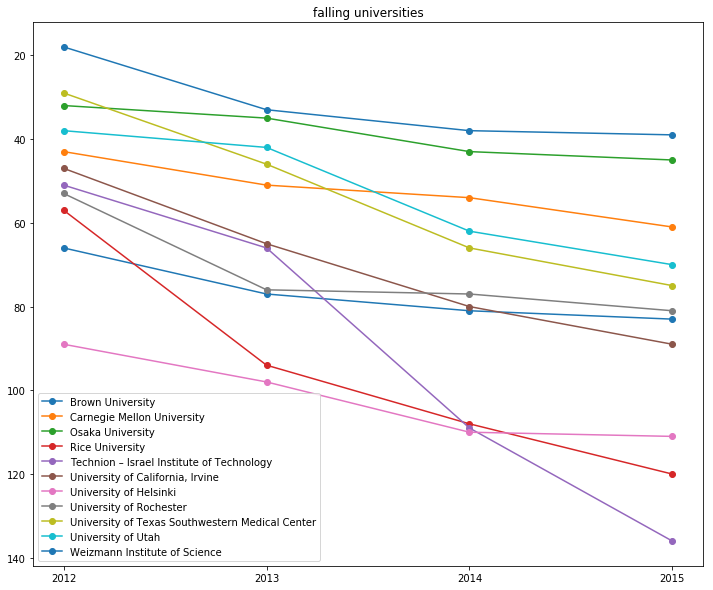

In [62]:
plt.figure(figsize=(10,10))
for univ in falling.index:
    plt.plot(falling.loc[univ], marker="o")
# plt.ylim((0,150))
plt.xticks([2012,2013,2014,2015])
plt.gca().invert_yaxis()
plt.title("falling universities")
plt.legend(list(falling.index))

In [67]:
stationary

year,2012,2013,2014,2015
institution,,,,
Harvard University,1.0,1.0,1.0,1.0


Some univerties are not listed because they are not included in all years. From above plots, we can know univerties keep falling/ rising/ stationary. 

### Q5. For 15 Points: Using the education expenditure data, identify the nations that spent below the average of the OECD for Higher Education Institutions in 1995, but above the average in 2010.

* Sort the nations by difference between 1995 and 2010
* Plot the lag, and explain your answers.

In [77]:
edu_exp[(edu_exp.country=="OECD Average") & (edu_exp.institute_type=="Higher Education Institutions ")]
print(edu_exp[(edu_exp.country=="OECD Average") & (edu_exp.institute_type=="Higher Education Institutions ")]['2010'].mean())

sub_df = edu_exp[edu_exp.institute_type=="Higher Education Institutions "][["country","direct_expenditure_type", "1995","2010"]]
targets = sub_df[(sub_df["1995"]<=0.9) & (sub_df["2010"] >= 1.1)]
targets["diff"] = targets["2010"] - targets["1995"]
targets.sort_values(by="diff")

1.1


/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,country,direct_expenditure_type,1995,2010,diff
74,OECD Average,Public,0.9,1.1,0.2
103,Spain,Public,0.8,1.1,0.3
89,Ireland,Public,0.9,1.3,0.4
88,Iceland,Public,0.7,1.1,0.4
77,Belgium,Public,0.9,1.4,0.5
76,Austria,Public,0.9,1.5,0.6


Text(0.5, 69.0, 'y_i')

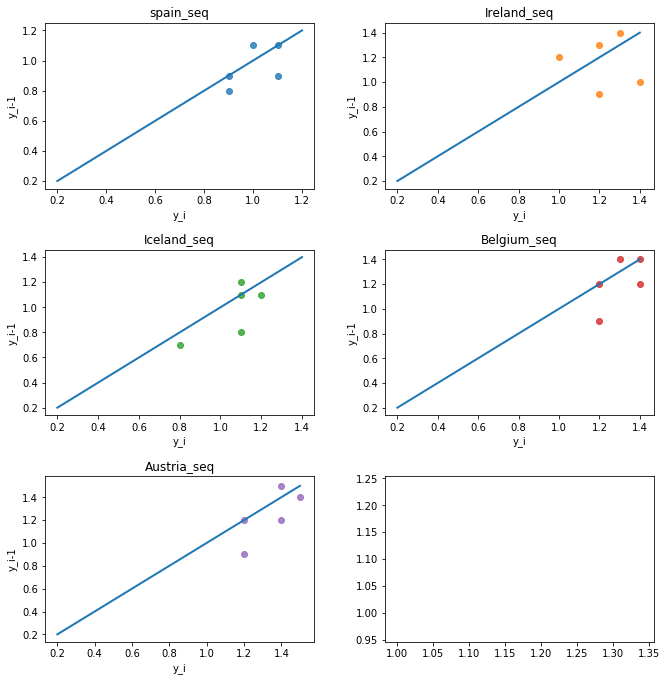

In [139]:
spain_seq = edu_exp.iloc[103][["1995","2000","2005","2009","2010","2011"]]
Ireland_seq = edu_exp.iloc[89][["1995","2000","2005","2009","2010","2011"]]
Iceland_seq = edu_exp.iloc[88][["1995","2000","2005","2009","2010","2011"]]
Belgium_seq = edu_exp.iloc[77][["1995","2000","2005","2009","2010","2011"]]
Austria_seq = edu_exp.iloc[76][["1995","2000","2005","2009","2010","2011"]]

fig, axes = plt.subplots(3,2)
fig.set_size_inches((10,10))
fig.tight_layout(pad=4)

sns.regplot(spain_seq[1:],spain_seq[:-1], fit_reg=False, ax=axes[0,0]).set_title("spain_seq")
sns.lineplot([0.2, 1.2], [0.2, 1.2], linewidth=2, ax=axes[0,0])
axes[0,0].set_ylabel("y_i-1")
axes[0,0].set_xlabel("y_i")

sns.regplot(Ireland_seq[1:],Ireland_seq[:-1], fit_reg=False, ax=axes[0,1]).set_title("Ireland_seq")
sns.lineplot([0.2, 1.4], [0.2, 1.4], linewidth=2, ax=axes[0,1])
axes[0,1].set_ylabel("y_i-1")
axes[0,1].set_xlabel("y_i")

sns.regplot(Iceland_seq[1:],Iceland_seq[:-1], fit_reg=False, ax=axes[1,0]).set_title("Iceland_seq")
sns.lineplot([0.2, 1.4], [0.2, 1.4], linewidth=2, ax=axes[1,0])
axes[1,0].set_ylabel("y_i-1")
axes[1,0].set_xlabel("y_i")

sns.regplot(Belgium_seq[1:],Belgium_seq[:-1], fit_reg=False, ax=axes[1,1]).set_title("Belgium_seq")
sns.lineplot([0.2, 1.4], [0.2, 1.4], linewidth=2, ax=axes[1,1])
axes[1,1].set_ylabel("y_i-1")
axes[1,1].set_xlabel("y_i")

sns.regplot(Austria_seq[1:],Austria_seq[:-1], fit_reg=False, ax=axes[2,0]).set_title("Austria_seq")
sns.lineplot([0.2, 1.5], [0.2, 1.5], linewidth=2, ax=axes[2,0])
axes[2,0].set_ylabel("y_i-1")
axes[2,0].set_xlabel("y_i")

From the above plots, compared with the line with slope 1, we can notice that not all countries make progress during each year, although all of them have been improved from 1995 to 2010. And the improvement happend in most years, as the points are below the line, meaning the y_i > yi-1.

### Q6. For 15 Points: Using the Times ranking, look at how the Female : Male ratio (`female_male_ratio` column) changes over time.

What were the distributions like in the year 2012 and 2015? How have these distributions changed?

You may want to convert the column values to an easier-to-understand measure, such as a percentage or the ratio of female students (the first numeric value in the ratio entry).

[0.49426966292134833,
 0.4976519337016575,
 0.4981593406593407,
 0.4978296703296703,
 0.4965469613259669]

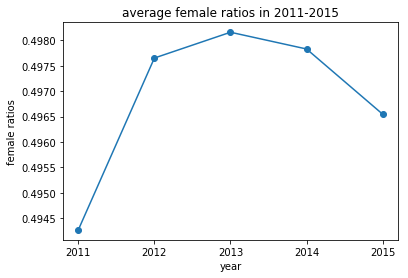

In [151]:
def percent(x):
    a, b = x.replace(" ","").split(":")
    if float(b)==0:
        return np.nan
    return float(a) / (float(b)+float(a))

avg_percent = []
for i in range(2011, 2016):
    avg_percent.append(timesData[timesData.year==i]["female_male_ratio"].dropna().apply(percent).mean())

plt.plot([2011,2012,2013,2014,2015],avg_percent, marker='o')
plt.xticks([2011,2012,2013,2014,2015])
plt.xlabel("year")
plt.ylabel("female ratios")
plt.title("average female ratios in 2011-2015")
avg_percent

Percentage or the ratio of female students on average has increased during the years from 2011 to 2013 and then, there is a lightly decreasing from 2013 to 2015, and researched nearly 49.55%.

### *Bonus* – For 5 Points: Which, if any, of the rankings from the Kaggle data set support the claims made in [this Times Higher Education article on public schools](https://www.timeshighereducation.com/student/best-universities/best-public-universities-united-states)?

Justify your claim with specific examples or data.

In [153]:
public_sel = pd.concat([shanghaiData[shanghaiData.university_name=="University of California, Los Angeles"],
           shanghaiData[shanghaiData.university_name=="University of Michigan - Ann Arbor"],
           shanghaiData[shanghaiData.university_name=="University of California, Berkeley"],
           shanghaiData[shanghaiData.university_name=="University of California, Davis"],
           shanghaiData[shanghaiData.university_name=="University of North Carolina at Chapel Hill"]])
public_sel

,world_rank,university_name,national_rank,total_score,alumni,award,hici,ns,pub,pcp,year
13,14,"University of California, Los Angeles",12,50.6,27.3,32.8,56.7,50.1,75.6,34.3,2005
513,14,"University of California, Los Angeles",12,50.4,26.4,32.1,57.6,47.5,77.3,34.9,2006
1012,13,"University of California, Los Angeles",11,52.6,25.6,42.8,57.4,49.1,75.9,35.5,2007
1522,13,"University of California, Los Angeles",11,52.4,24.4,42.8,57.4,48.9,75.7,36.0,2008
2025,13,"University of California, Los Angeles",11,52.3,23.8,42.8,57.4,50.3,74.5,36.2,2009
2526,13,"University of California, Los Angeles",11,52.2,27.2,42.6,56.9,49.2,75.1,31.2,2010
3025,12,"University of California, Los Angeles",10,53.0,30.0,42.6,57.5,53.1,73.6,30.3,2011
3525,12,"University of California, Los Angeles",10,52.2,27.7,43.4,57.7,51.5,72.2,30.1,2012
3809,12,"University of California, Los Angeles",10.0,52.9,27.3,47.4,57.7,51.7,71.2,31.1,2013
3908,12,"University of California, Los Angeles",10,51.9,30.2,47.1,52.8,50.9,71.3,31.7,2014


From shanghaiData, all the 5 public universities inlcuding Umich listed rank ahead of 40th in the world. We can know that these schools are realy great. We also find that Umich has a quite stable ranking of 18th over these years. 